In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('training_set_VU_DM.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

In [3]:
print(data.columns)
print(data.isnull().sum()[data.isnull().sum() != 0])


Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [ ]:
# import pandas as pd
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler

# RAW   = 'training_set_VU_DM.csv'
# CLEAN = 'cleaned.csv'


# numeric_columns = [
#     'visitor_hist_starrating', 'visitor_hist_adr_usd',
#     'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price',
#     'price_usd',
#     'srch_length_of_stay', 'srch_booking_window',
#     'srch_adults_count', 'srch_children_count', 'srch_room_count',
#     'srch_saturday_night_bool', 'srch_query_affinity_score',
#     'orig_destination_distance',
#     'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff',
#     'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff',
#     'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff',
#     'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff',
#     'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff',
#     'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff',
#     'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff',
#     'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff'
# ]

# binary_cols = ['booking_bool']
# id_cols     = ['srch_id']

# keep_cols = numeric_columns + binary_cols + id_cols
# df = pd.read_csv(RAW, low_memory=False, usecols=keep_cols)


# num_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler' , StandardScaler())
# ])

# bin_pipeline = SimpleImputer(strategy='most_frequent')


# pre = ColumnTransformer(
#     transformers=[
#         ('num', num_pipeline, numeric_columns),
#         ('bin', bin_pipeline,   binary_cols),
#         ('id' , 'passthrough',  id_cols)        
#     ],
#     remainder='drop',
#     verbose_feature_names_out=False
# )


# clean_arr = pre.fit_transform(df)
# clean_cols = pre.get_feature_names_out()
# clean = pd.DataFrame(clean_arr, columns=clean_cols)

# clean.to_csv(CLEAN, index=False)
# print(f"✅ Data saved to {CLEAN} with {clean.shape[1]} columns")

In [5]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from pathlib import Path

RAW   = 'training_set_VU_DM.csv'
CLEAN = 'cleaned.csv'

# Essential columns required for features + modeling
numeric_columns = [
    'visitor_hist_starrating', 'visitor_hist_adr_usd',
    'prop_location_score1', 'prop_location_score2',
    'prop_starrating', 'price_usd', 'gross_bookings_usd', 'position',
] + [f'comp{i}_{t}' for i in range(1, 9) for t in ['rate', 'inv', 'rate_percent_diff']]

binary_cols = ['click_bool', 'booking_bool']
id_cols = ['srch_id']
datetime_col = 'date_time'

# Columns to read
usecols = numeric_columns + binary_cols + id_cols + [datetime_col]

# Load data
df = pd.read_csv(RAW, low_memory=False, usecols=usecols, parse_dates=[datetime_col])

# Numeric columns with sufficient variance (exclude binary/integer)
num_cols = [c for c in numeric_columns if df[c].dtype != 'int64' or df[c].nunique() > 2]

# Pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler())
])
bin_pipeline = SimpleImputer(strategy='most_frequent')
id_pipeline = 'passthrough'  # No transformation

# Column transformer
pre = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('bin', bin_pipeline, binary_cols),
        ('id', id_pipeline, id_cols)
    ],
    remainder='drop',
    verbose_feature_names_out=False
)

# Fit + transform
clean_arr = pre.fit_transform(df)
clean = pd.DataFrame(clean_arr, columns=pre.get_feature_names_out())

# ✅ Manually add the datetime column back
clean[datetime_col] = df[datetime_col].values

# Save cleaned data
clean.to_csv(CLEAN, index=False)
print(f"✅ Data saved to {CLEAN} with shape {clean.shape}")


✅ Data saved to cleaned.csv with shape (4958347, 36)


In [6]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)

['srch_id', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'click_bool', 'gross_

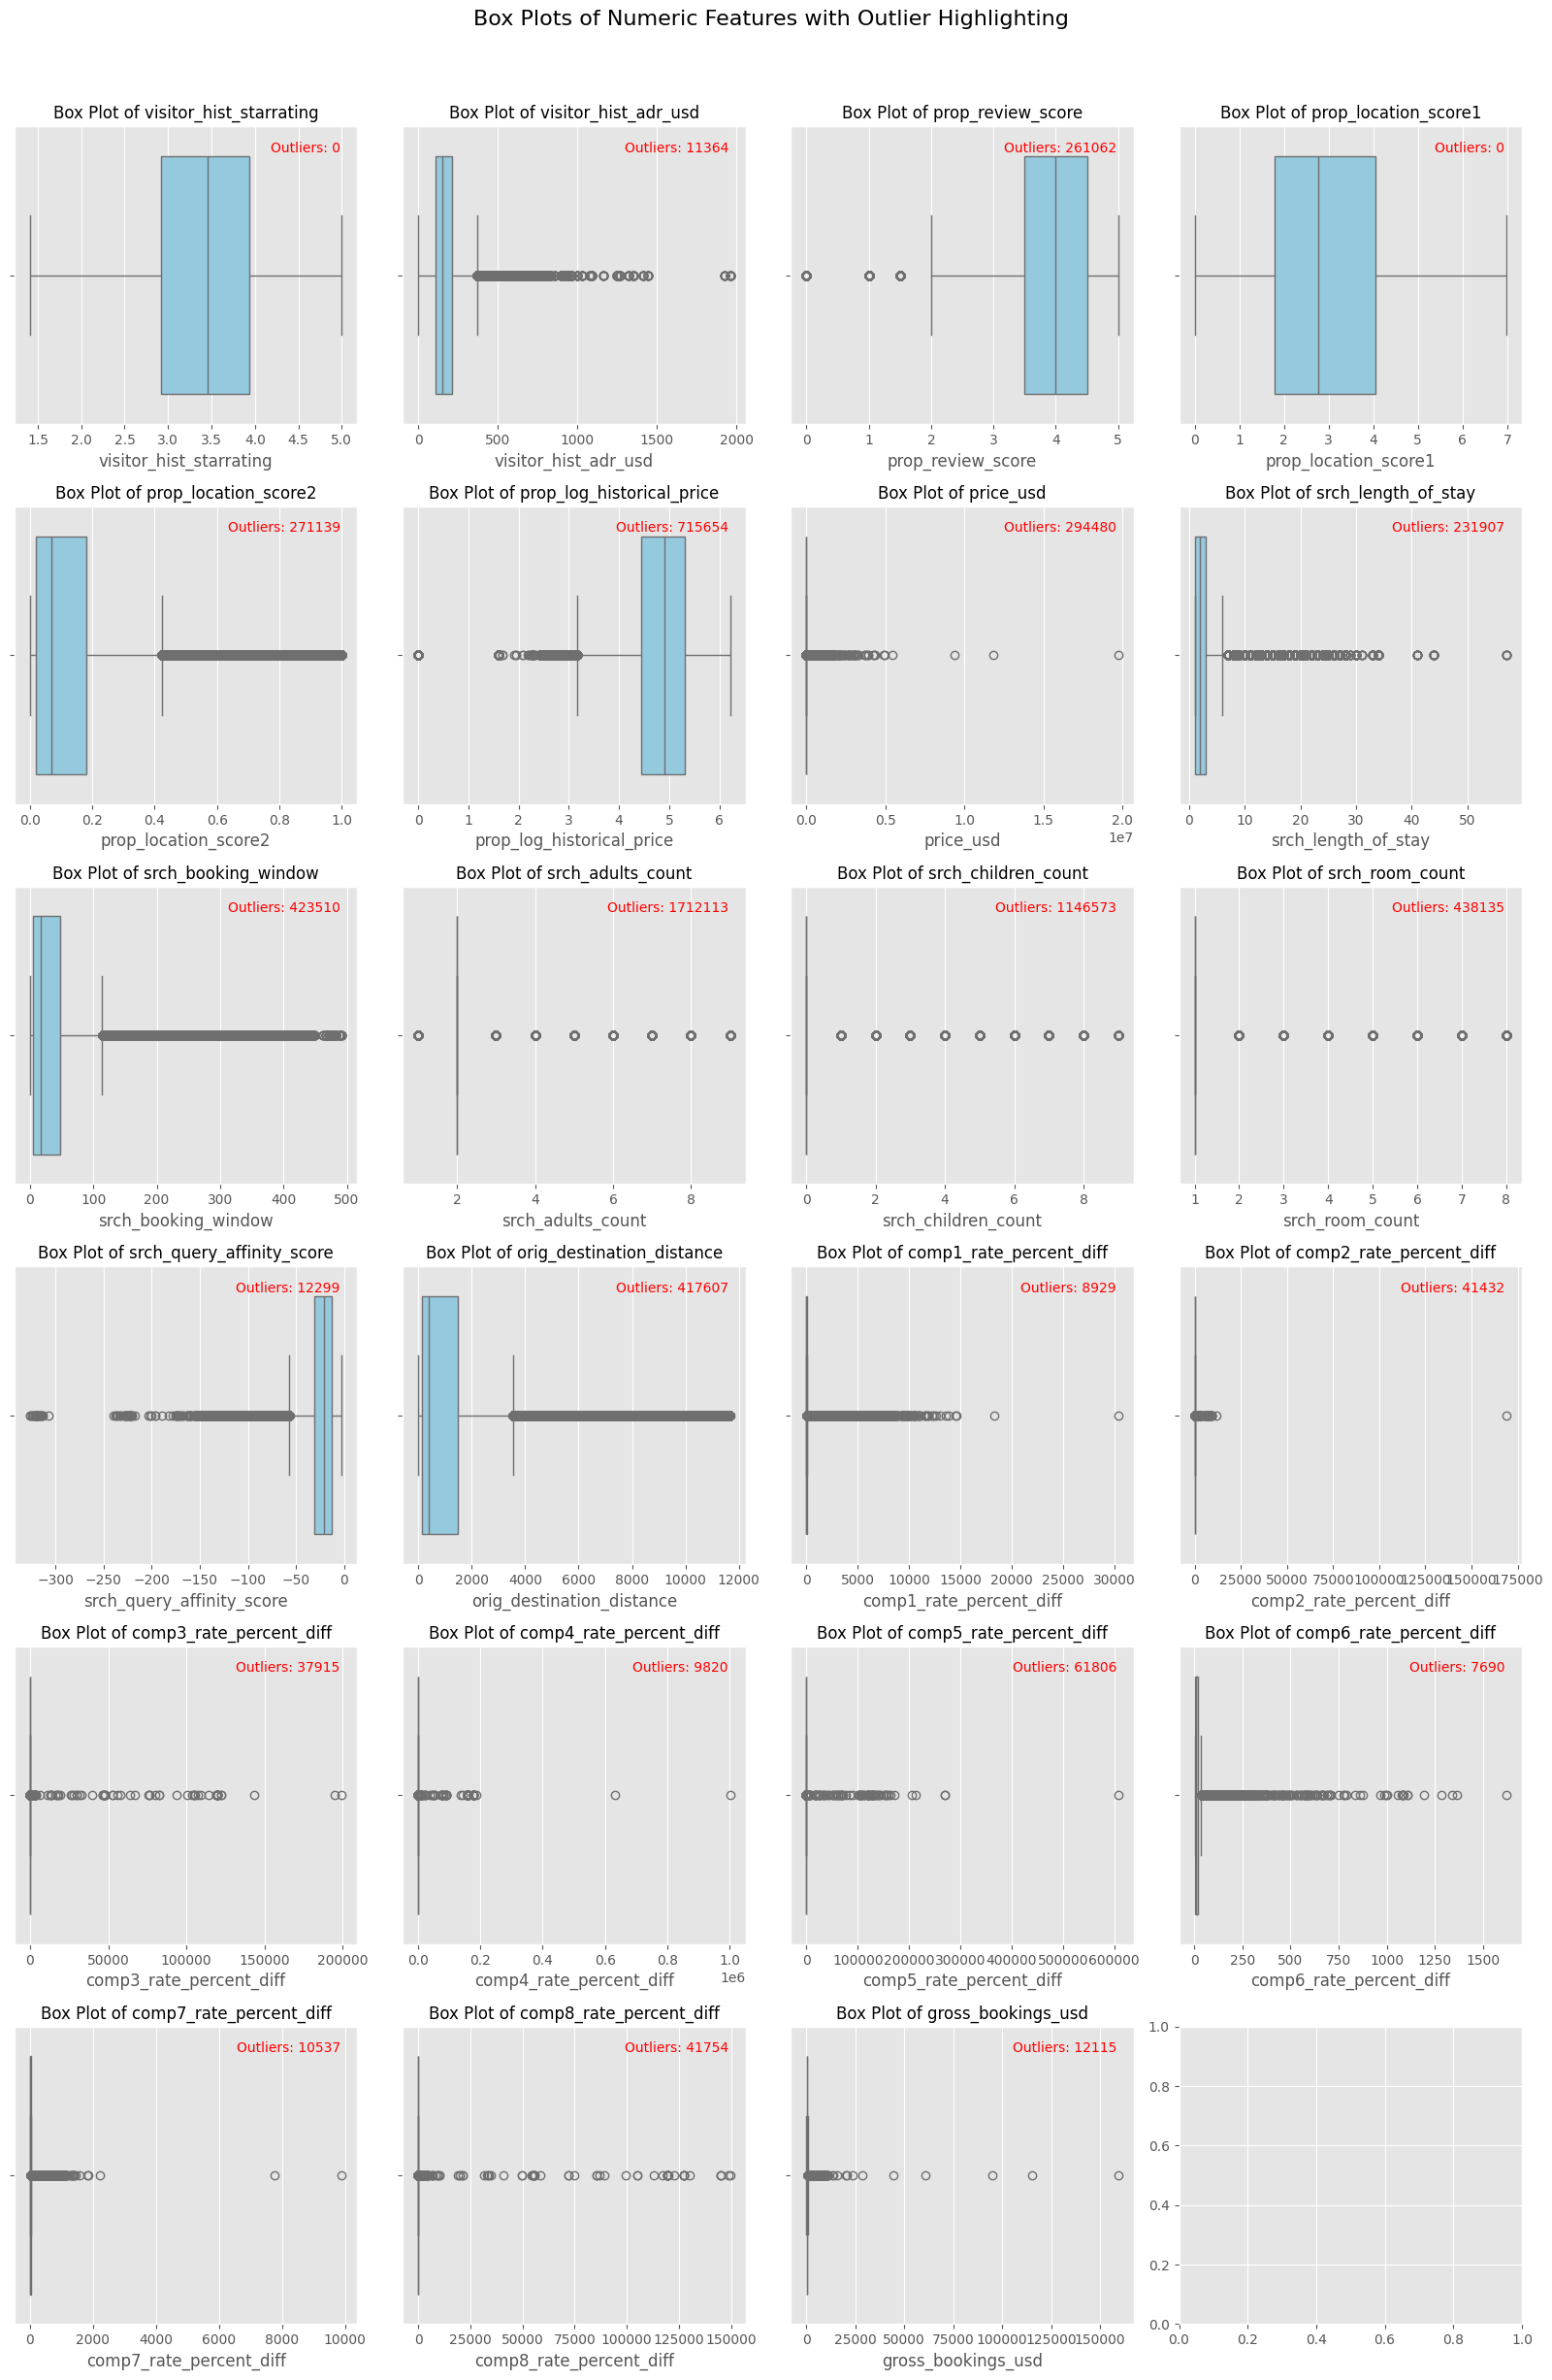

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')

numeric_columns = [
    'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_review_score',
    'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price',
    'price_usd', 'srch_length_of_stay', 'srch_booking_window',
    'srch_adults_count', 'srch_children_count', 'srch_room_count',
    'srch_query_affinity_score', 'orig_destination_distance',
    'comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff',
    'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 'comp6_rate_percent_diff',
    'comp7_rate_percent_diff', 'comp8_rate_percent_diff', 'gross_bookings_usd'
]

n_cols = 4
n_rows = int(np.ceil(len(numeric_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
fig.suptitle("Box Plots of Numeric Features with Outlier Highlighting", fontsize=16, y=1.02)

for i, feature in enumerate(numeric_columns):
    row, col = divmod(i, n_cols)
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)][feature]
    sns.boxplot(x=data[feature], ax=axes[row, col], color='skyblue', flierprops={'marker': 'o', 'color': 'red'})
    axes[row, col].set_title(f'Box Plot of {feature}', fontsize=12)
    axes[row, col].text(0.95, 0.95, f'Outliers: {len(outliers)}', transform=axes[row, col].transAxes, 
                        fontsize=10, verticalalignment='top', horizontalalignment='right', color='red')

plt.tight_layout()
plt.show()


In [8]:
from sklearn.preprocessing import RobustScaler

for col in numeric_columns:
    if col in data.columns:
        q1, q3 = data[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        data[col] = np.clip(data[col], lower, upper)

scaler = RobustScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

print(data[numeric_columns].describe())


       visitor_hist_starrating  visitor_hist_adr_usd  prop_review_score  \
count            251866.000000         252988.000000       4.950983e+06   
mean                 -0.074917              0.167885      -1.238340e-01   
std                   0.685662              0.781096       7.428197e-01   
min                  -2.019802             -1.468364      -2.000000e+00   
25%                  -0.524752             -0.409240      -5.000000e-01   
50%                   0.000000              0.000000       0.000000e+00   
75%                   0.475248              0.590760       5.000000e-01   
max                   1.534653              2.090760       1.000000e+00   

       prop_location_score1  prop_location_score2  prop_log_historical_price  \
count          4.958347e+06          3.867999e+06               4.958347e+06   
mean           4.559493e-02          3.149957e-01              -1.593109e-01   
std            6.804494e-01          7.959424e-01               9.503313e-01   
min 

In [9]:
data['date_time'] = pd.to_datetime(data['date_time'])
data['month'] = data['date_time'].dt.month
data['day_of_week'] = data['date_time'].dt.weekday
data['hour'] = data['date_time'].dt.hour
data['week_of_year'] = data['date_time'].dt.isocalendar().week


In [10]:
# data.to_csv('cleaned.csv', index=False)

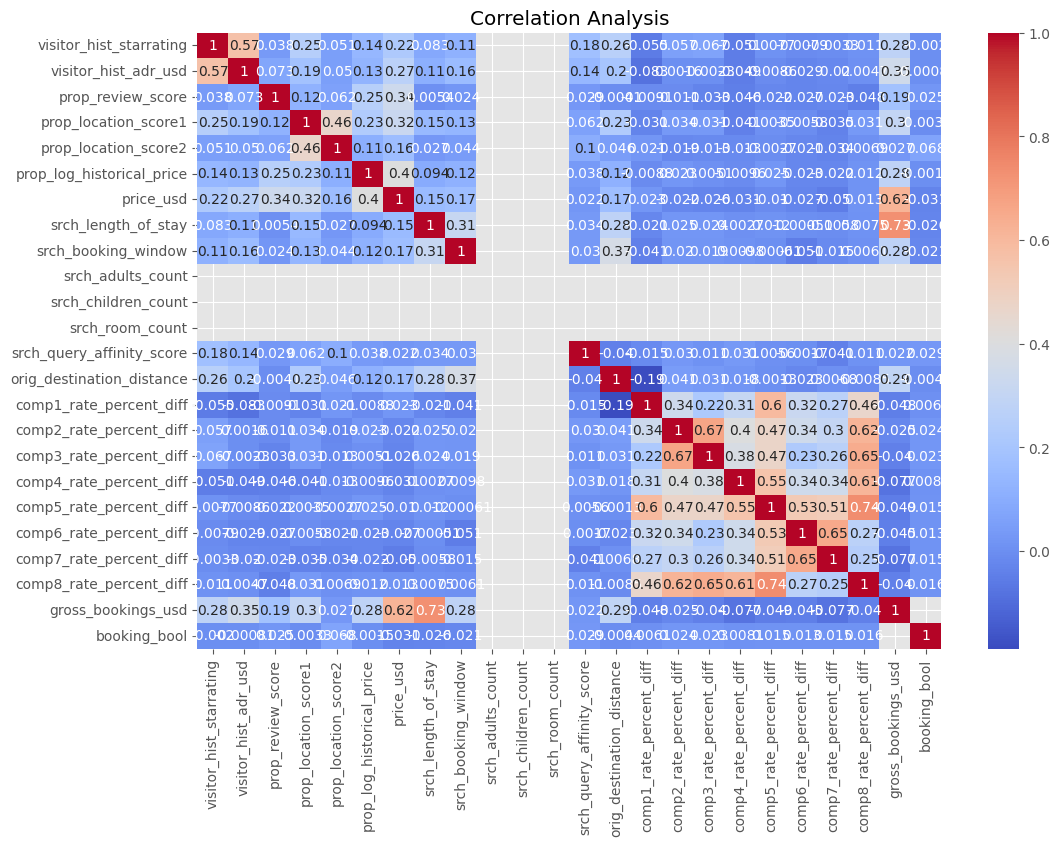

/scratch-local/avozikis.11897092/ipykernel_3232424/3039573149.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/avozikis/my_env/lib64/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


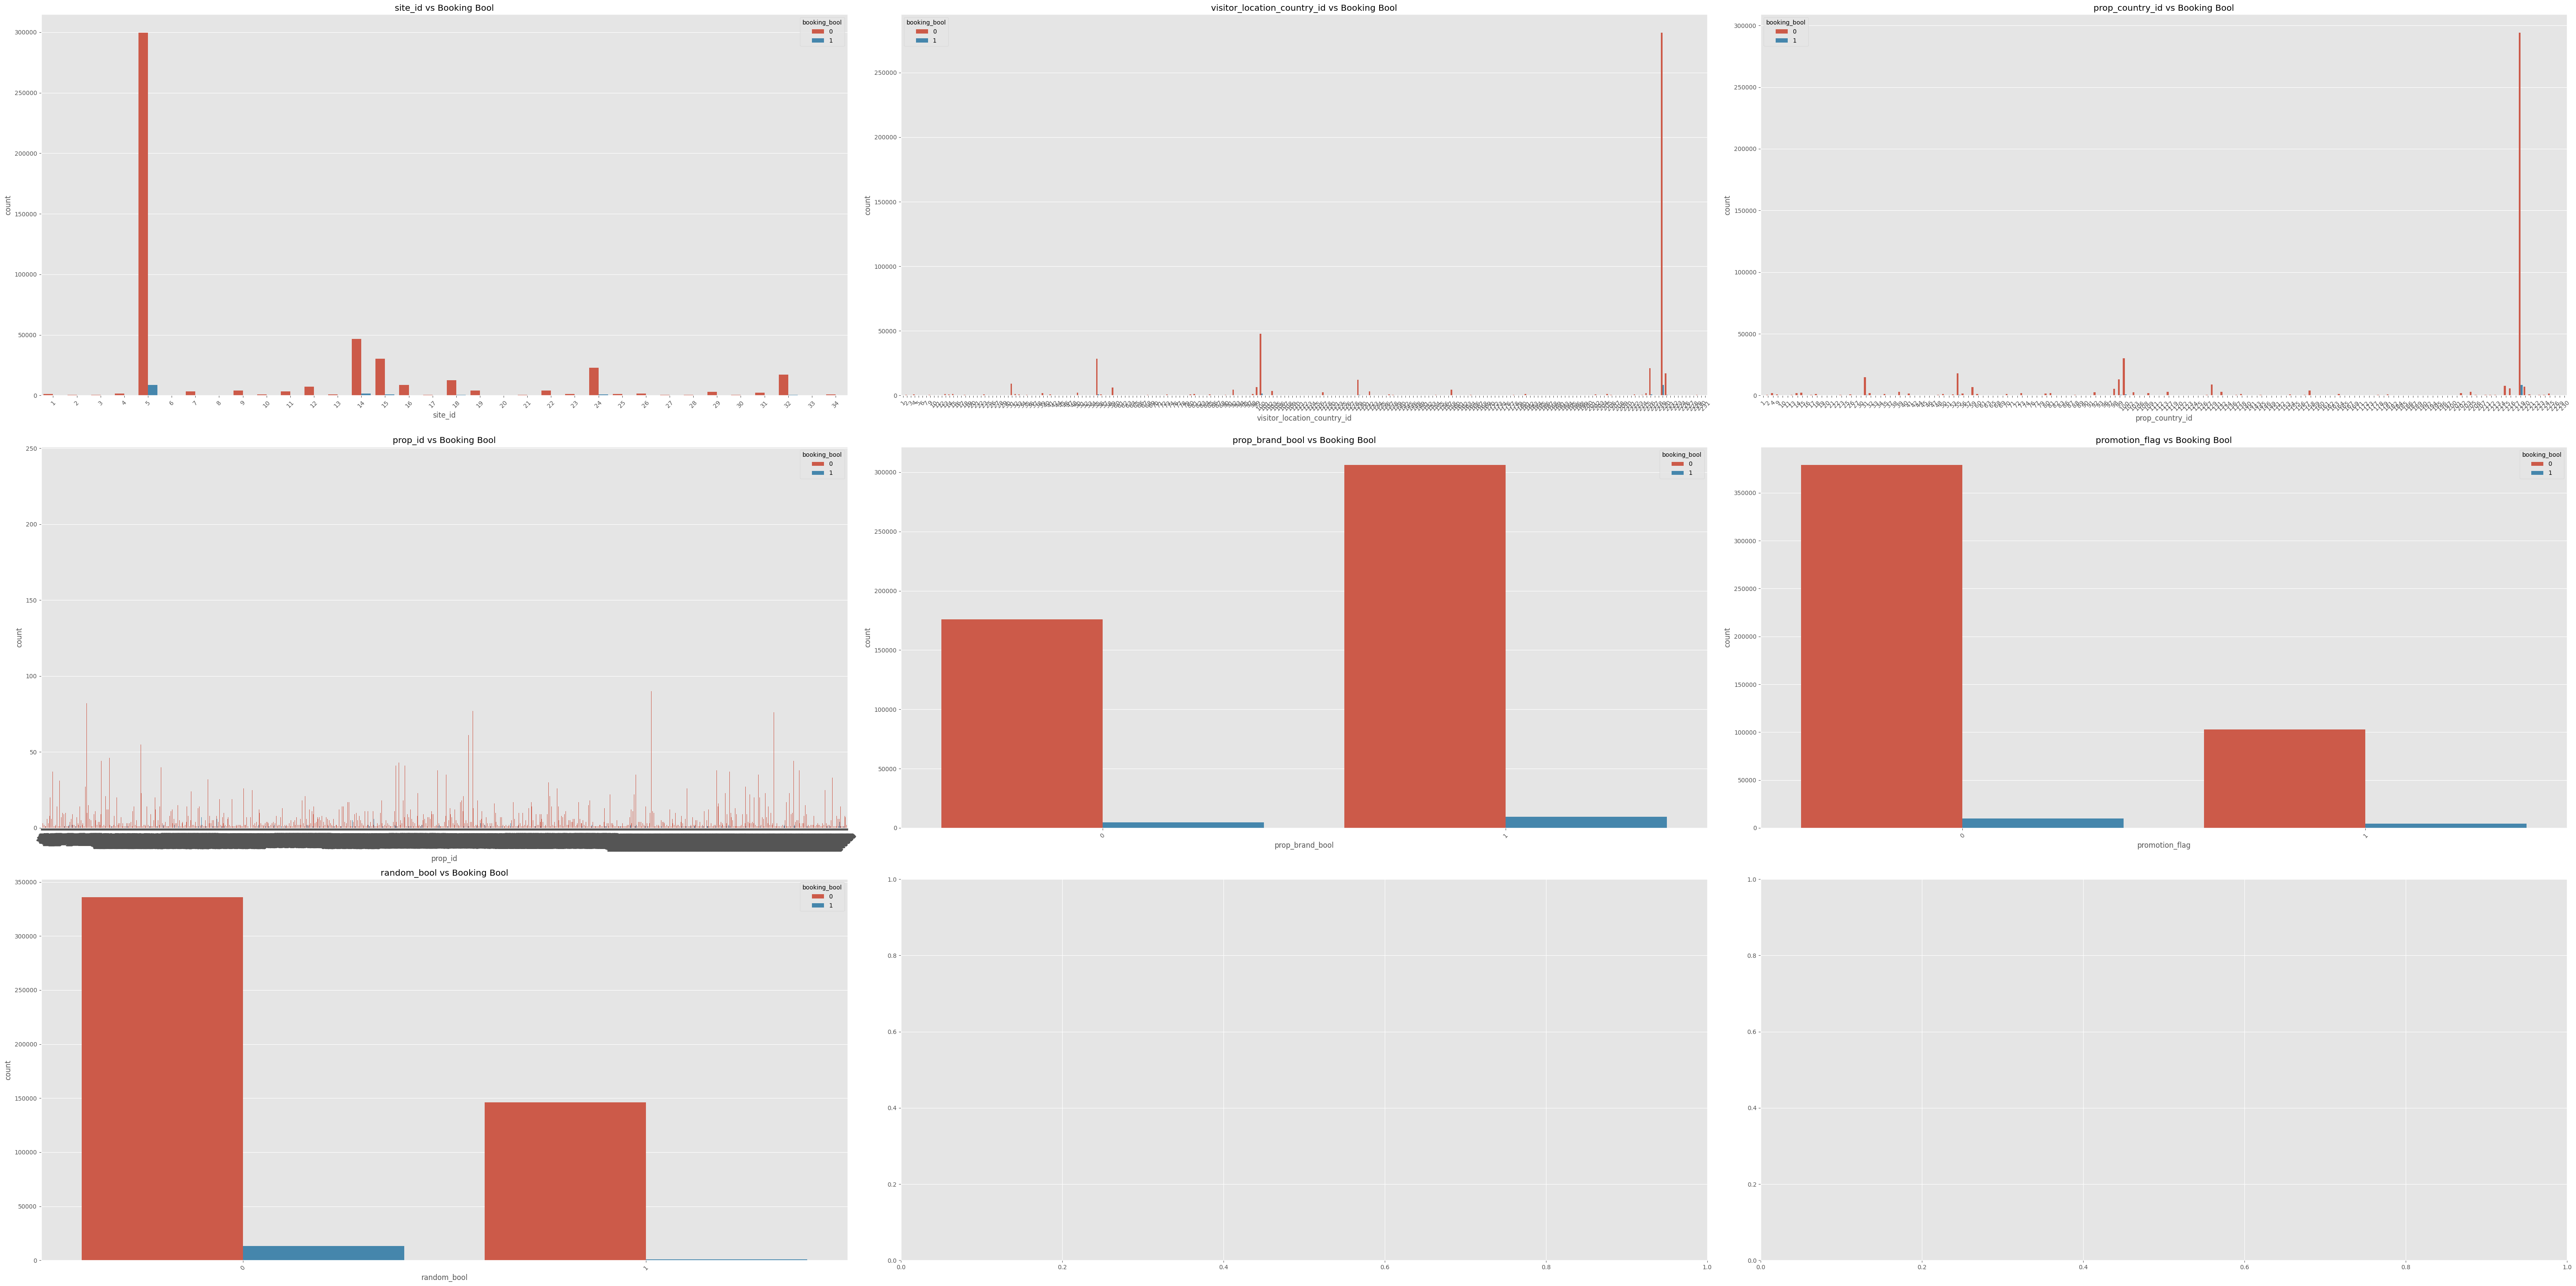

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

numeric_features = [
    'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_review_score',
    'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price',
    'price_usd', 'srch_length_of_stay', 'srch_booking_window',
    'srch_adults_count', 'srch_children_count', 'srch_room_count',
    'srch_query_affinity_score', 'orig_destination_distance',
    'comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff',
    'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 'comp6_rate_percent_diff',
    'comp7_rate_percent_diff', 'comp8_rate_percent_diff', 'gross_bookings_usd'
]

correlation_matrix = data[numeric_features + ['booking_bool']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

categorical_features = [
    'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 
    'prop_brand_bool', 'promotion_flag', 'random_bool'
]

sampled_data = data.sample(frac=0.1, random_state=42)

fig, axes = plt.subplots(3, 3, figsize=(60, 30
))

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='booking_bool', data=sampled_data, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'{feature} vs Booking Bool')
    axes[i // 3, i % 3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

X = data[numeric_features + categorical_features]
y = data['booking_bool']

model = RandomForestClassifier(n_estimators=50, n_jobs=-1)
model.fit(X, y)

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
mean_score = np.mean(cv_scores)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(50, 25))
sns.barplot(x=sorted_importances[:15], y=sorted_importances[:15].index, palette='viridis')
plt.title(f'Top 15 Feature Importances (CV Accuracy: {mean_score:.2f})')
plt.show()


/home/avozikis/my_env/lib64/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/avozikis/my_env/lib64/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


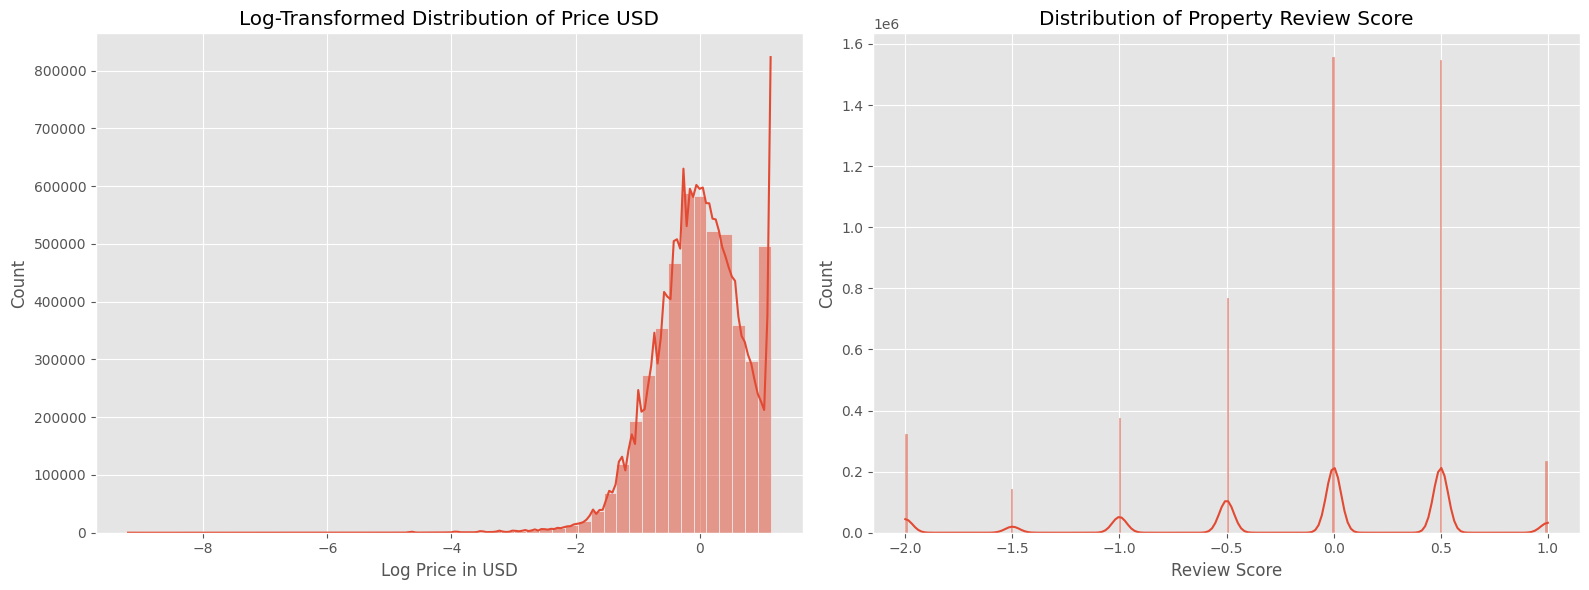

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

log_price = np.log1p(data['price_usd'])
sns.histplot(log_price, bins=50, kde=True, ax=axes[0])
axes[0].set_title('Log-Transformed Distribution of Price USD')
axes[0].set_xlabel('Log Price in USD')

sns.histplot(data['prop_review_score'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Property Review Score')
axes[1].set_xlabel('Review Score')

plt.tight_layout()
plt.show()


/home/avozikis/my_env/lib64/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/avozikis/my_env/lib64/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/avozikis/my_env/lib64/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/avozikis/my_env/lib64/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


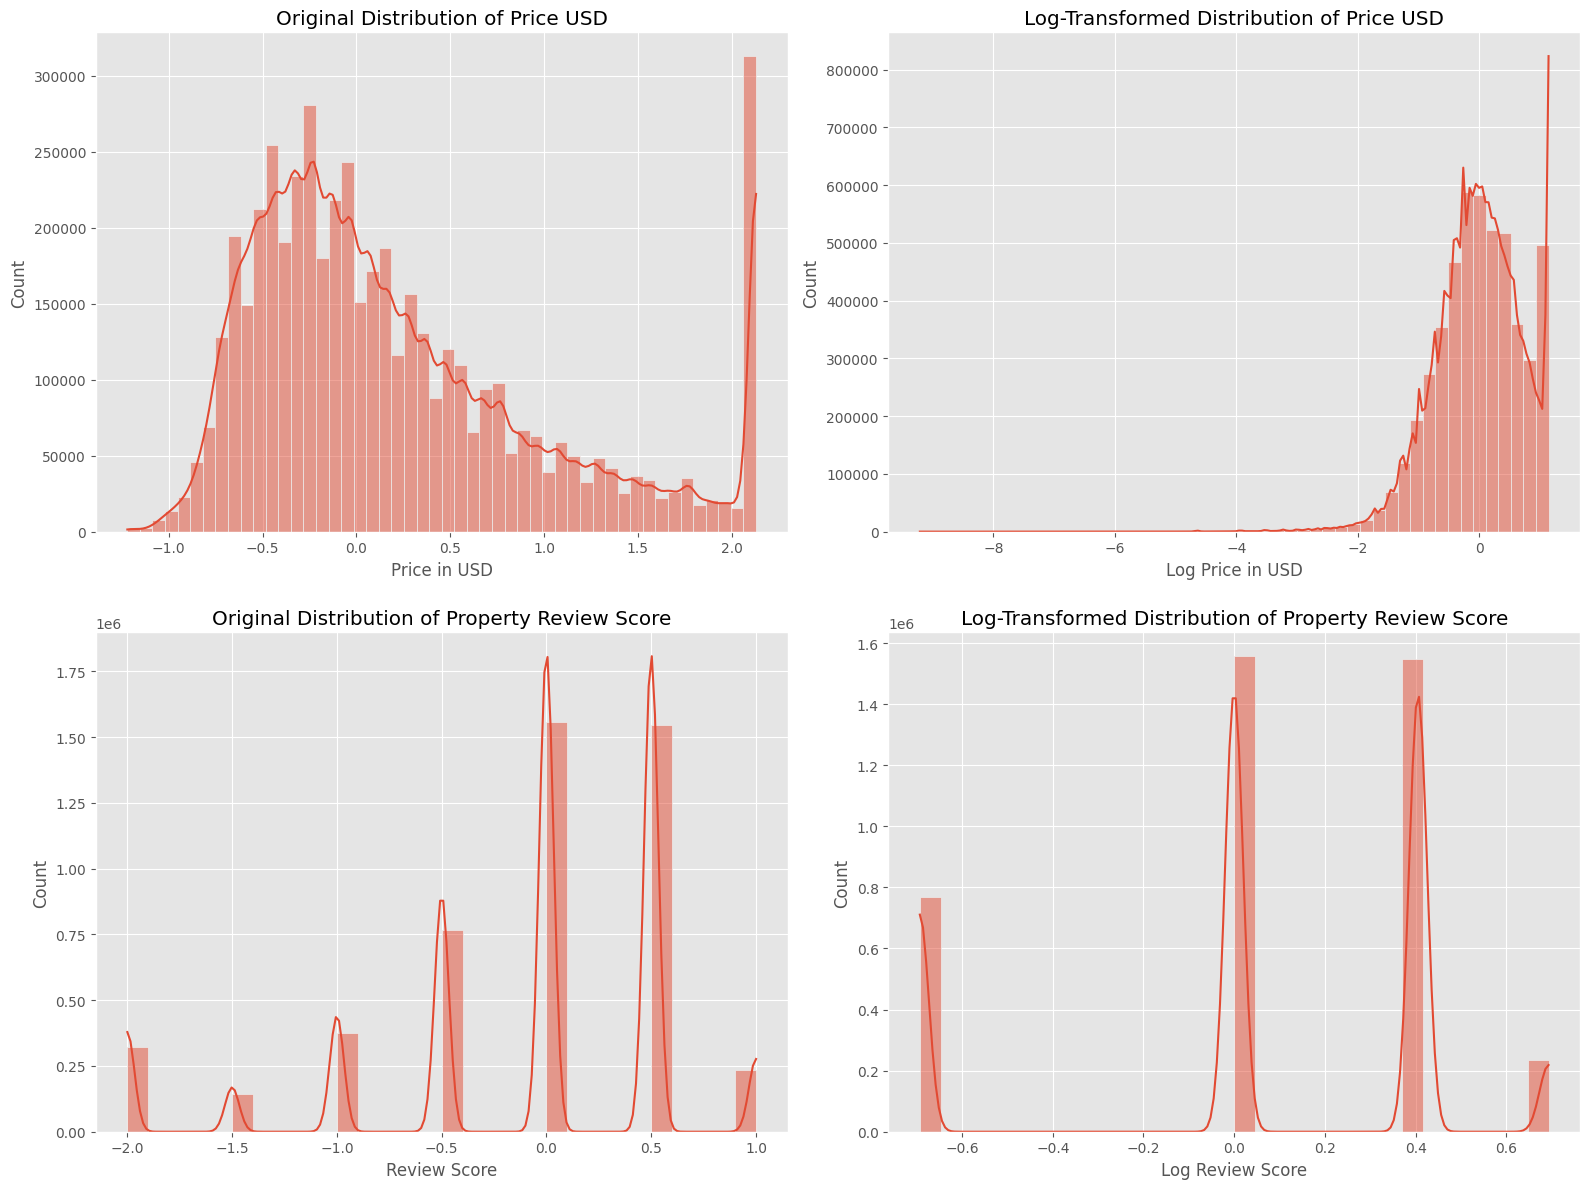

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(data['price_usd'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Distribution of Price USD')
axes[0, 0].set_xlabel('Price in USD')

log_price = np.log1p(data['price_usd'])
sns.histplot(log_price, bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Log-Transformed Distribution of Price USD')
axes[0, 1].set_xlabel('Log Price in USD')

sns.histplot(data['prop_review_score'].dropna(), bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Original Distribution of Property Review Score')
axes[1, 0].set_xlabel('Review Score')

log_review_score = np.log1p(data['prop_review_score'].dropna())
sns.histplot(log_review_score, bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Log-Transformed Distribution of Property Review Score')
axes[1, 1].set_xlabel('Log Review Score')

plt.tight_layout()
plt.show()


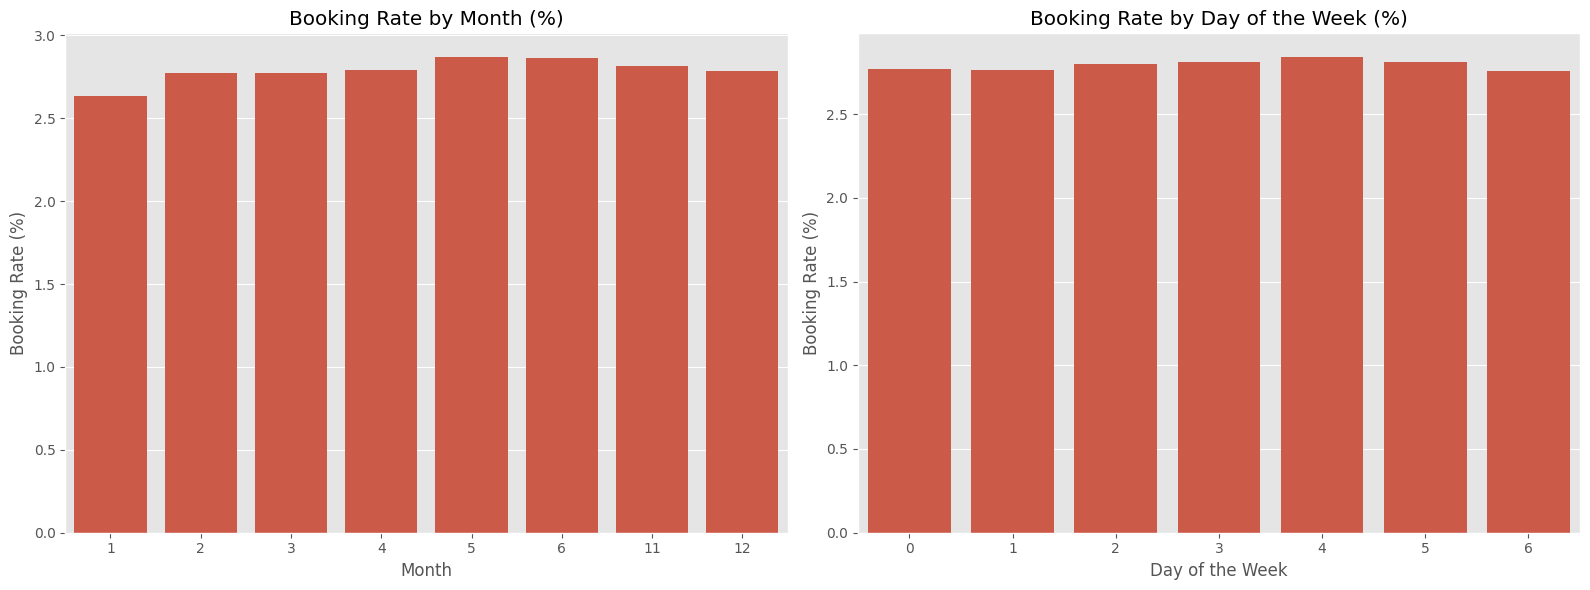

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

monthly_counts = data.groupby(['month', 'booking_bool']).size().unstack(fill_value=0)
monthly_rates = (monthly_counts.div(monthly_counts.sum(axis=1), axis=0) * 100)

sns.barplot(x=monthly_rates.index, y=monthly_rates[1], ax=axes[0])
axes[0].set_title('Booking Rate by Month (%)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Booking Rate (%)')

weekday_counts = data.groupby(['day_of_week', 'booking_bool']).size().unstack(fill_value=0)
weekday_rates = (weekday_counts.div(weekday_counts.sum(axis=1), axis=0) * 100)

sns.barplot(x=weekday_rates.index, y=weekday_rates[1], ax=axes[1])
axes[1].set_title('Booking Rate by Day of the Week (%)')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Booking Rate (%)')

plt.tight_layout()
plt.show()


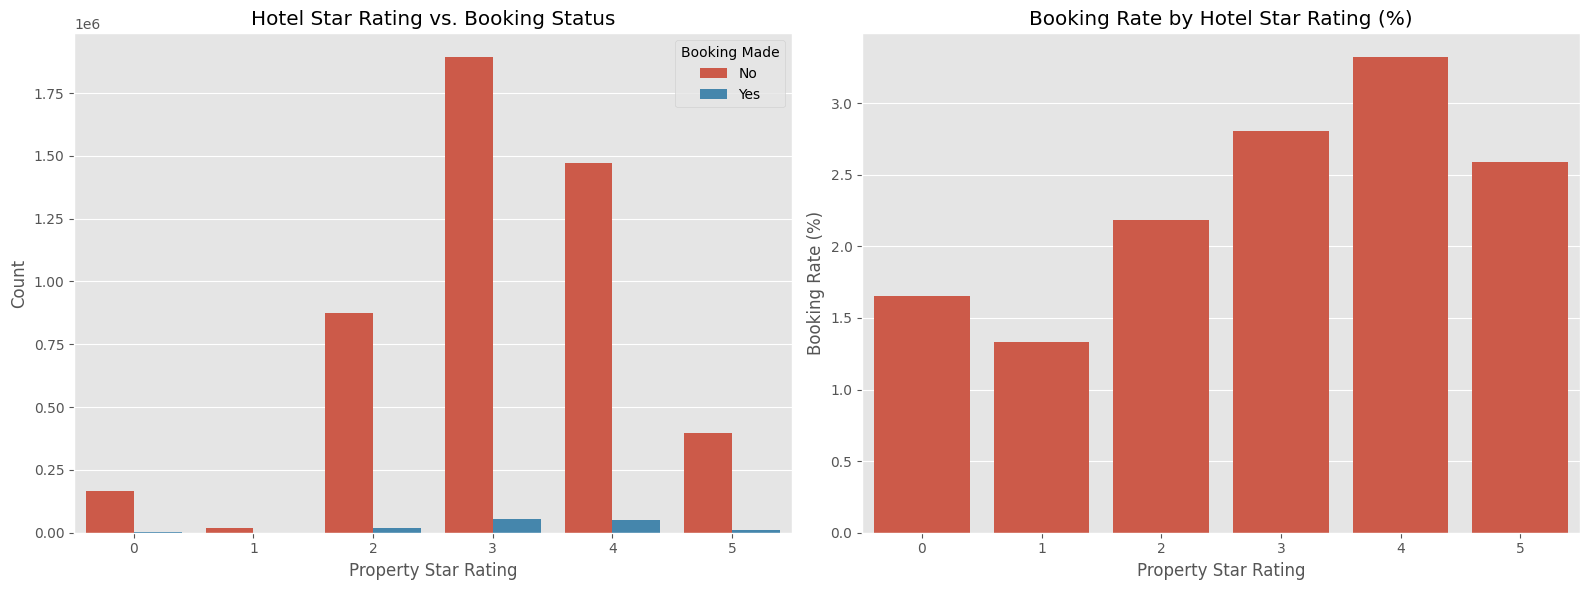

In [19]:
star_counts = data.groupby(['prop_starrating', 'booking_bool']).size().unstack(fill_value=0)
star_rates = (star_counts.div(star_counts.sum(axis=1), axis=0) * 100)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='prop_starrating', hue='booking_bool', data=data, ax=axes[0])
axes[0].set_title('Hotel Star Rating vs. Booking Status')
axes[0].set_xlabel('Property Star Rating')
axes[0].set_ylabel('Count')
axes[0].legend(title='Booking Made', labels=['No', 'Yes'])

sns.barplot(x=star_rates.index, y=star_rates[1], ax=axes[1])
axes[1].set_title('Booking Rate by Hotel Star Rating (%)')
axes[1].set_xlabel('Property Star Rating')
axes[1].set_ylabel('Booking Rate (%)')

plt.tight_layout()
plt.show()


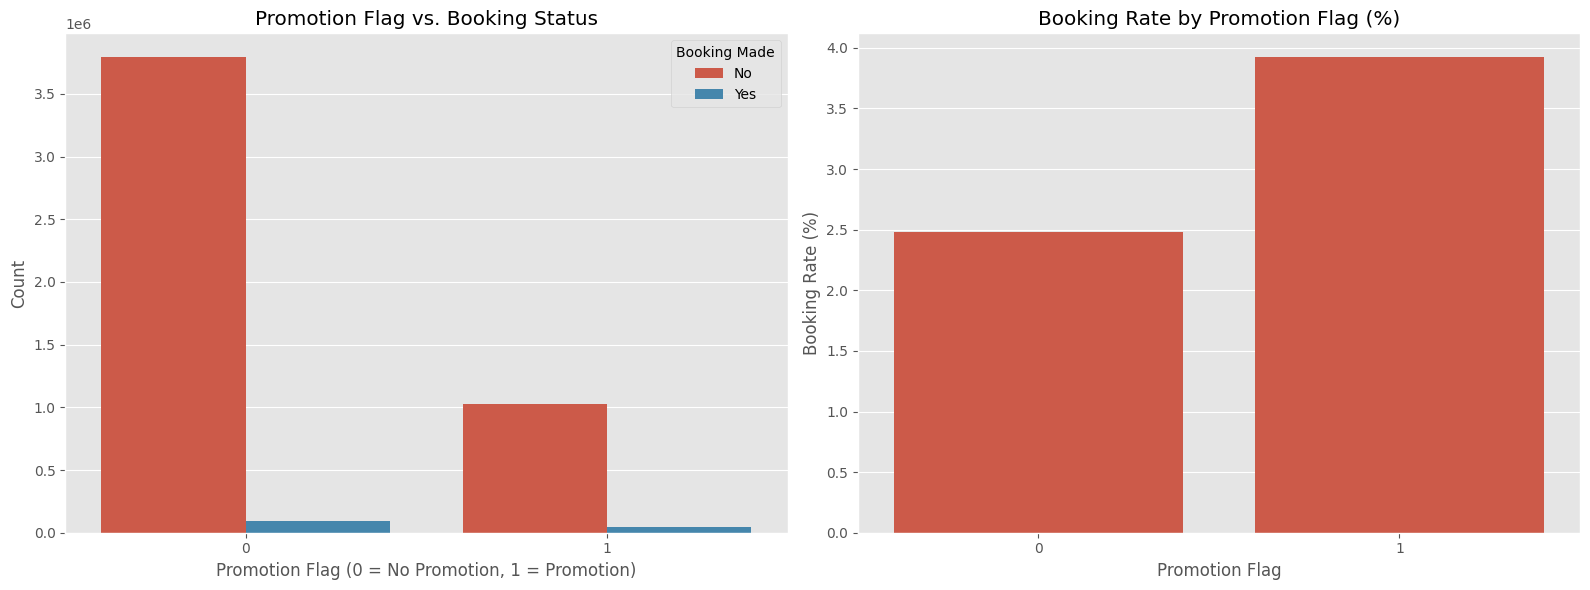

In [20]:
promo_counts = data.groupby(['promotion_flag', 'booking_bool']).size().unstack(fill_value=0)
promo_rates = (promo_counts.div(promo_counts.sum(axis=1), axis=0) * 100)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='promotion_flag', hue='booking_bool', data=data, ax=axes[0])
axes[0].set_title('Promotion Flag vs. Booking Status')
axes[0].set_xlabel('Promotion Flag (0 = No Promotion, 1 = Promotion)')
axes[0].set_ylabel('Count')
axes[0].legend(title='Booking Made', labels=['No', 'Yes'])

sns.barplot(x=promo_rates.index, y=promo_rates[1], ax=axes[1])
axes[1].set_title('Booking Rate by Promotion Flag (%)')
axes[1].set_xlabel('Promotion Flag')
axes[1].set_ylabel('Booking Rate (%)')

plt.tight_layout()
plt.show()


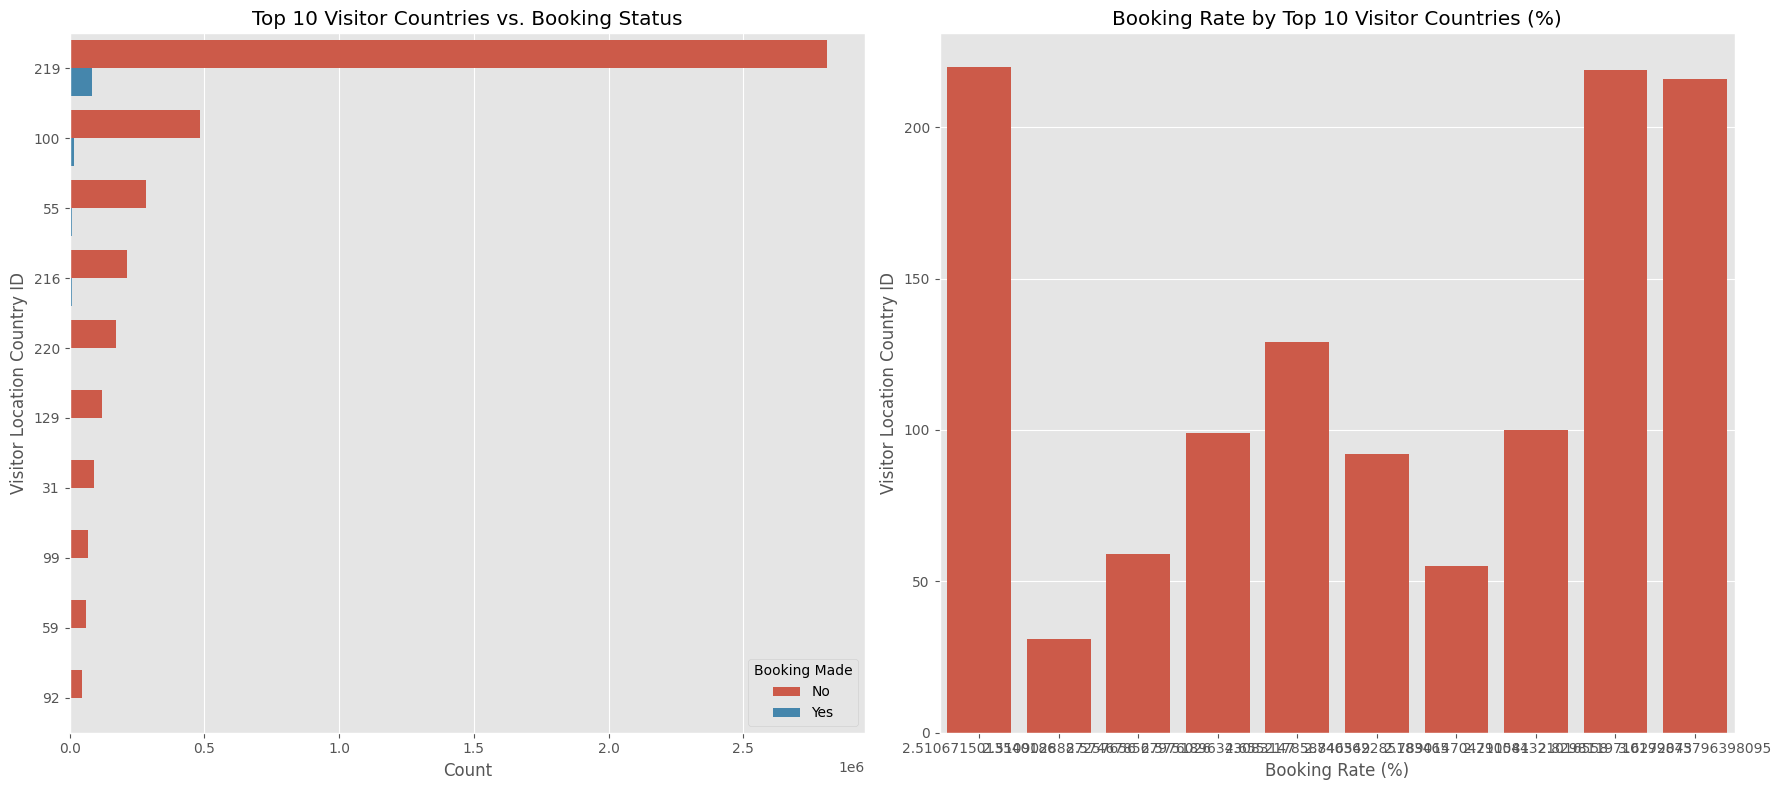

In [21]:
top_countries = data[data['booking_bool'] == 1]['visitor_location_country_id'].value_counts().iloc[:10].index
country_counts = data[data['visitor_location_country_id'].isin(top_countries)].groupby(['visitor_location_country_id', 'booking_bool']).size().unstack(fill_value=0)
country_rates = (country_counts.div(country_counts.sum(axis=1), axis=0) * 100)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(y='visitor_location_country_id', hue='booking_bool', 
             data=data[data['visitor_location_country_id'].isin(top_countries)], 
             order=top_countries, ax=axes[0])
axes[0].set_title('Top 10 Visitor Countries vs. Booking Status')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Visitor Location Country ID')
axes[0].legend(title='Booking Made', labels=['No', 'Yes'])

sns.barplot(x=country_rates[1], y=country_rates.index, ax=axes[1])
axes[1].set_title('Booking Rate by Top 10 Visitor Countries (%)')
axes[1].set_xlabel('Booking Rate (%)')
axes[1].set_ylabel('Visitor Location Country ID')

plt.tight_layout()
plt.show()


/home/avozikis/my_env/lib64/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/avozikis/my_env/lib64/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/avozikis/my_env/lib64/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


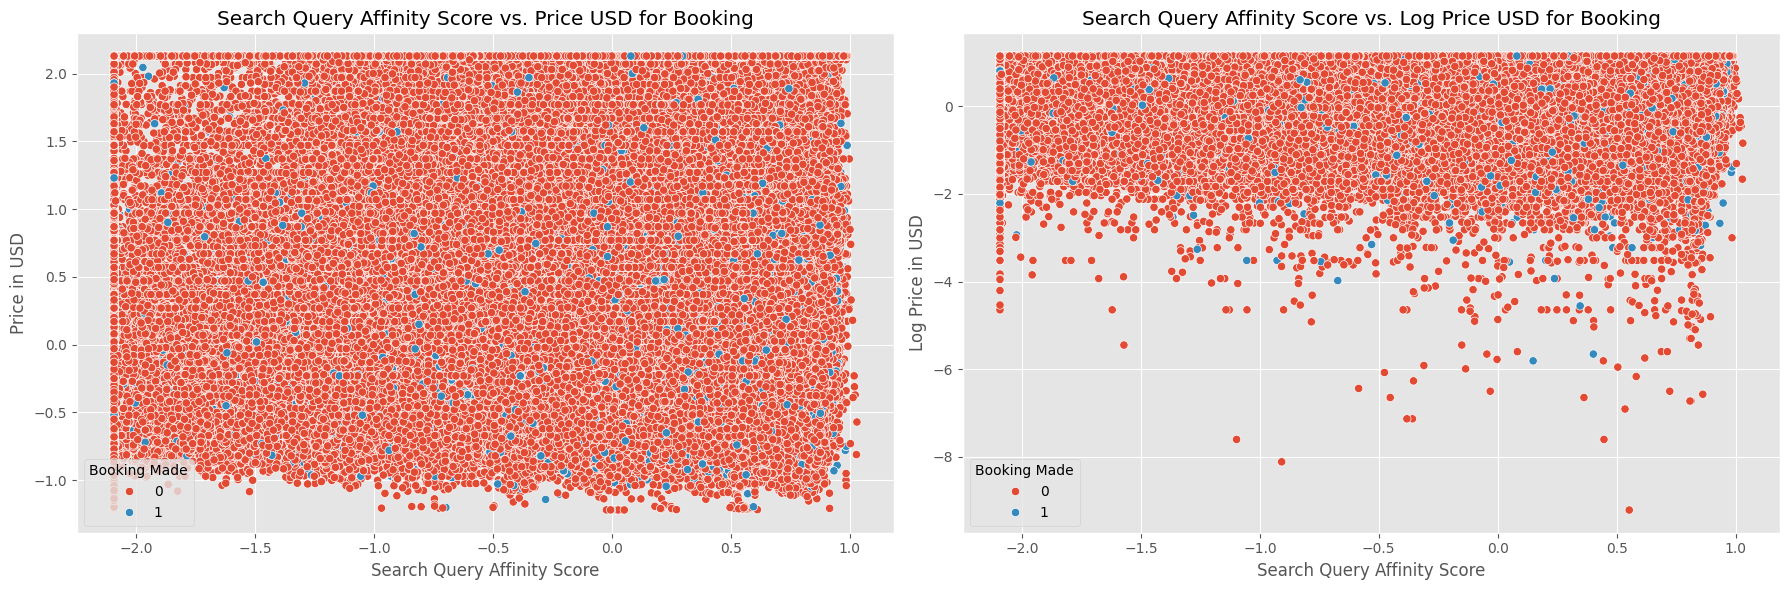

In [22]:
log_price = np.log1p(data['price_usd'])

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(x='srch_query_affinity_score', y='price_usd', hue='booking_bool', data=data, ax=axes[0])
axes[0].set_title('Search Query Affinity Score vs. Price USD for Booking')
axes[0].set_xlabel('Search Query Affinity Score')
axes[0].set_ylabel('Price in USD')
axes[0].legend(title='Booking Made')

sns.scatterplot(x='srch_query_affinity_score', y=log_price, hue='booking_bool', data=data, ax=axes[1])
axes[1].set_title('Search Query Affinity Score vs. Log Price USD for Booking')
axes[1].set_xlabel('Search Query Affinity Score')
axes[1].set_ylabel('Log Price in USD')
axes[1].legend(title='Booking Made')

plt.tight_layout()
plt.show()


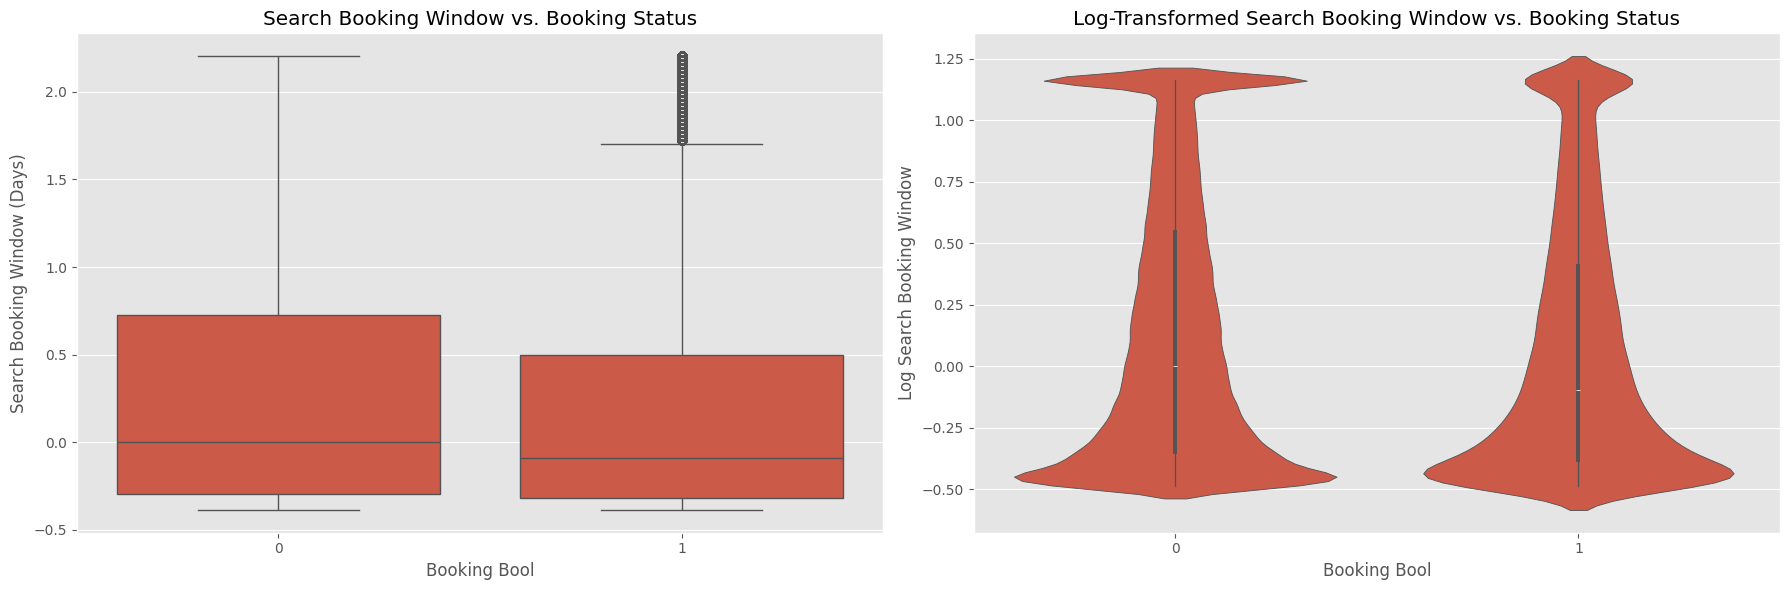

In [23]:
log_booking_window = np.log1p(data['srch_booking_window'])

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(x='booking_bool', y='srch_booking_window', data=data, ax=axes[0])
axes[0].set_title('Search Booking Window vs. Booking Status')
axes[0].set_xlabel('Booking Bool')
axes[0].set_ylabel('Search Booking Window (Days)')

sns.violinplot(x='booking_bool', y=log_booking_window, data=data, ax=axes[1])
axes[1].set_title('Log-Transformed Search Booking Window vs. Booking Status')
axes[1].set_xlabel('Booking Bool')
axes[1].set_ylabel('Log Search Booking Window')

plt.tight_layout()
plt.show()
